# UK Air Quality

An exploration of the UK Air quality data collected and presented by the Department for Environment, Food and Rural Affairs (DEFRA)

Data Source - https://uk-air.defra.gov.uk/data/DAQI-regional-data

DEFRA uses a scores air quality across the country on a scale from 1 - 10. One meaning the lowest pollution levels and ten the highest. This figure is derived from the worst of 5 main pollutants each day and for different parts of the country. A full explanation of the scoring system can be found here - https://uk-air.defra.gov.uk/air-pollution/daqi?view=more-info&pollutant=ozone#pollutant

Having downloaded the daily scores for all areas of the country dating back to the start of the year 2000 the following codes aims to provide an initial investigation of the data.

## Data Cleaning/Preparation

In [40]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"C:\Users\jakeo\OneDrive\Documents\Data Analysis\Projects\Air Quality\UK Air quality - Master.csv")
df


,Date,Central Scotland,East Midlands,Eastern,Greater London,Highland,North East,North East Scotland,North Wales,North West & Merseyside,...,Greater Manchester Urban Area,Leicester Urban Area,Liverpool Urban Area,Nottingham Urban Area,Portsmouth Urban Area,Sheffield Urban Area,Swansea Urban Area,Tyneside,West Midlands Urban Area,West Yorkshire Urban Area
0,01/01/2000,3,3,2,2,3,3,2,3,3,...,3,2,2.0,2,NaN,2,3,3,2,2
1,02/01/2000,3,3,3,3,3,3,2,3,2,...,2,2,2.0,2,NaN,2,3,3,2,2
2,03/01/2000,3,3,3,3,3,3,2,3,3,...,3,3,3.0,2,NaN,3,3,3,3,3
3,04/01/2000,3,3,3,3,3,3,1,3,3,...,3,2,2.0,2,NaN,2,3,2,2,2
4,05/01/2000,3,2,2,3,3,3,1,3,3,...,3,2,2.0,2,NaN,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,23/10/2023,2,2,2,2,3,2,2,2,2,...,2,2,2.0,1,2.0,2,2,2,2,2
8697,24/10/2023,2,2,2,2,3,2,3,2,2,...,2,2,2.0,1,2.0,2,2,2,2,2
8698,25/10/2023,2,2,2,2,2,2,2,2,2,...,2,1,2.0,2,2.0,2,2,2,2,1
8699,26/10/2023,2,2,2,3,3,3,2,2,2,...,2,2,2.0,2,2.0,2,3,2,2,2


In [43]:
df.dtypes

Date                               datetime64[ns]
Central Scotland                            int64
East Midlands                               int64
Eastern                                     int64
Greater London                              int64
Highland                                    int64
North East                                  int64
North East Scotland                         int64
North Wales                                 int64
North West & Merseyside                     int64
Northern Ireland                            int64
Scottish Borders                            int64
South East                                  int64
South Wales                                 int64
South West                                  int64
West Midlands                               int64
Yorkshire & Humberside                      int64
Belfast Metropolitan Urban Area             int64
Brighton/Worthing/Littlehampton             int64
Bristol Urban Area                          int64


Here we can see that the data has imported correctly, however, due to some missing data, not all data is of the same type (int64 and float64). Additionally the date has been brought in as an object and needs converting.

In [42]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
All_Areas = ['Central Scotland', 'East Midlands', 'Eastern', 'Greater London', 'Highland',
 'North East', 'North East Scotland', 'North Wales',
 'North West & Merseyside', 'Northern Ireland', 'Scottish Borders',
 'South East', 'South Wales', 'South West', 'West Midlands',
 'Yorkshire & Humberside', 'Belfast Metropolitan Urban Area',
 'Brighton/Worthing/Littlehampton', 'Bristol Urban Area',
 'Cardiff Urban Area', 'Edinburgh Urban Area', 'Glasgow Urban Area',
 'Greater Manchester Urban Area', 'Leicester Urban Area',
 'Liverpool Urban Area', 'Nottingham Urban Area', 'Portsmouth Urban Area',
 'Sheffield Urban Area', 'Swansea Urban Area', 'Tyneside',
 'West Midlands Urban Area', 'West Yorkshire Urban Area']

In [44]:
df[All_Areas] = df[All_Areas].astype(float)

In [45]:
df.dtypes


Date                               datetime64[ns]
Central Scotland                          float64
East Midlands                             float64
Eastern                                   float64
Greater London                            float64
Highland                                  float64
North East                                float64
North East Scotland                       float64
North Wales                               float64
North West & Merseyside                   float64
Northern Ireland                          float64
Scottish Borders                          float64
South East                                float64
South Wales                               float64
South West                                float64
West Midlands                             float64
Yorkshire & Humberside                    float64
Belfast Metropolitan Urban Area           float64
Brighton/Worthing/Littlehampton           float64
Bristol Urban Area                        float64


The data is now all an appropriate consistent type. 

In [9]:
df.min()

Date                               2000-01-01 00:00:00
Central Scotland                                   1.0
East Midlands                                      2.0
Eastern                                            2.0
Greater London                                     1.0
Highland                                           0.0
North East                                         1.0
North East Scotland                                0.0
North Wales                                        0.0
North West & Merseyside                            1.0
Northern Ireland                                   1.0
Scottish Borders                                   0.0
South East                                         2.0
South Wales                                        2.0
South West                                         2.0
West Midlands                                      2.0
Yorkshire & Humberside                             2.0
Belfast Metropolitan Urban Area                    0.0
Brighton/W

The reults of df.min() show that there are a number of nonsensical values. Given the Air Quality scale scores of 0 are not possible.

To further clean the data all 0 values are replaced with NaN

In [46]:
df.replace(0, np.nan, inplace=True)

In [47]:
df.min()

Date                               2000-01-01 00:00:00
Central Scotland                                   1.0
East Midlands                                      2.0
Eastern                                            2.0
Greater London                                     1.0
Highland                                           1.0
North East                                         1.0
North East Scotland                                1.0
North Wales                                        1.0
North West & Merseyside                            1.0
Northern Ireland                                   1.0
Scottish Borders                                   1.0
South East                                         2.0
South Wales                                        2.0
South West                                         2.0
West Midlands                                      2.0
Yorkshire & Humberside                             2.0
Belfast Metropolitan Urban Area                    1.0
Brighton/W

A recheck of the minimum values shows that the code worked correctly

In [49]:
df.count()

Date                               8701
Central Scotland                   8701
East Midlands                      8701
Eastern                            8701
Greater London                     8701
Highland                           8636
North East                         8701
North East Scotland                8663
North Wales                        8594
North West & Merseyside            8701
Northern Ireland                   8701
Scottish Borders                   8699
South East                         8701
South Wales                        8701
South West                         8701
West Midlands                      8701
Yorkshire & Humberside             8701
Belfast Metropolitan Urban Area    8663
Brighton/Worthing/Littlehampton    8669
Bristol Urban Area                 8701
Cardiff Urban Area                 8444
Edinburgh Urban Area               8391
Glasgow Urban Area                 8681
Greater Manchester Urban Area      8701
Leicester Urban Area               8670


Following the changing of 0 values to NaN we can see that while there are a number of missing values across the dataset. Not enough to greatly affect any averarching statistics, however is these missing values are concentrated across similar dates then their impact may be seen.

## Data Analysis

In [50]:
df

,Date,Central Scotland,East Midlands,Eastern,Greater London,Highland,North East,North East Scotland,North Wales,North West & Merseyside,...,Greater Manchester Urban Area,Leicester Urban Area,Liverpool Urban Area,Nottingham Urban Area,Portsmouth Urban Area,Sheffield Urban Area,Swansea Urban Area,Tyneside,West Midlands Urban Area,West Yorkshire Urban Area
0,2000-01-01,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,2.0,2.0,NaN,2.0,3.0,3.0,2.0,2.0
1,2000-01-02,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,NaN,2.0,3.0,3.0,2.0,2.0
2,2000-01-03,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,3.0,2.0,NaN,3.0,3.0,3.0,3.0,3.0
3,2000-01-04,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,...,3.0,2.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2.0
4,2000-01-05,3.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,...,3.0,2.0,2.0,2.0,NaN,2.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,2023-10-23,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
8697,2023-10-24,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
8698,2023-10-25,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
8699,2023-10-26,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0


In [52]:
df[(All_Areas)].describe()

,Central Scotland,East Midlands,Eastern,Greater London,Highland,North East,North East Scotland,North Wales,North West & Merseyside,Northern Ireland,...,Greater Manchester Urban Area,Leicester Urban Area,Liverpool Urban Area,Nottingham Urban Area,Portsmouth Urban Area,Sheffield Urban Area,Swansea Urban Area,Tyneside,West Midlands Urban Area,West Yorkshire Urban Area
count,8701.000000,8701.000000,8701.000000,8701.000000,8636.000000,8701.000000,8663.000000,8594.000000,8701.000000,8701.000000,...,8701.000000,8670.000000,8430.000000,8673.000000,8329.000000,8651.000000,8696.000000,8658.000000,8701.000000,8699.000000
mean,2.947247,2.987588,3.176531,3.264337,2.940829,2.810596,2.339143,2.781126,3.075394,2.810826,...,2.682565,2.473702,2.562396,2.407356,2.505103,2.546180,2.893514,2.430122,2.766004,2.573399
std,0.797322,0.851007,0.920573,1.002412,0.594002,0.786661,0.716562,0.736672,0.936031,0.777161,...,0.877643,0.796050,0.777141,0.745204,0.828470,0.788083,0.970134,0.641291,0.823755,0.877000
min,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,10.000000,10.000000,10.000000,10.000000,7.000000,10.000000,10.000000,8.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: title={'center': 'Average Air Quality Index 2000 - 2023'}, xlabel='Area', ylabel='Average Air Quality Index'>

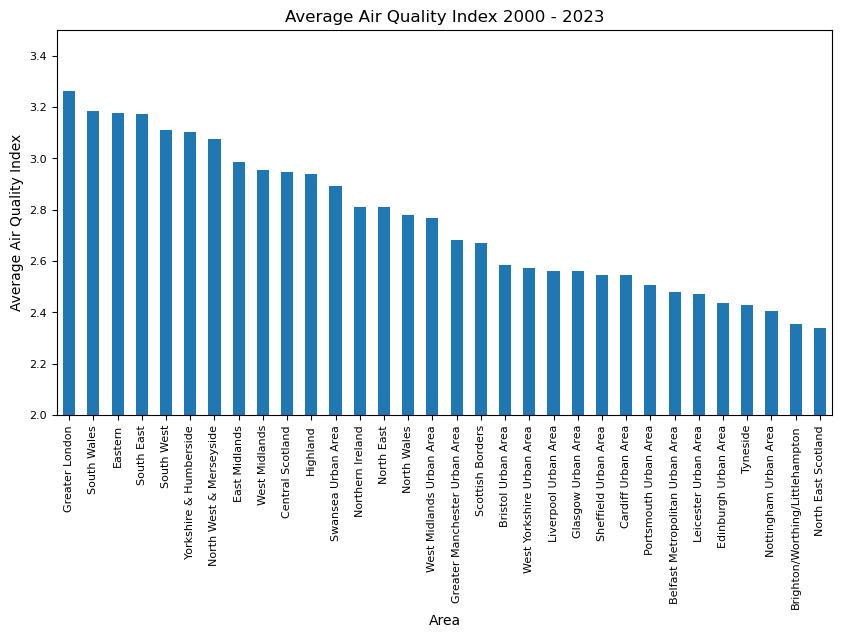

In [54]:
Ranked = df[(All_Areas)].mean().sort_values(ascending = False)

Ranked.plot(kind = 'bar',
            figsize = (10,5),
            title = 'Average Air Quality Index 2000 - 2023',
            xlabel = 'Area', 
            ylabel = 'Average Air Quality Index',
            ylim = (2,3.5),
            #rot = 45,
            fontsize = 8)

The bar chart above ranks the average air quality index score for each area covered since 2000. As might be expected Greater London has the worst air quality, most likely sue to being a huge city, and conversely North East Scotland has the best.

However the concentration of Urban Areas at the lower end of the scale is counterintuitive. The DEFRA website download procedure for these areas is diffrent to the regions. Perhaps the difference is scoring is due to the methodology for urban areas differeing to that in the regions, or perhaps the results are correct. Further investigation is needed.

<Axes: title={'center': 'Index Score Distribution Comparison 2000 - 2023'}, xlabel='Air Quality Index Score', ylabel='Score Frequency'>

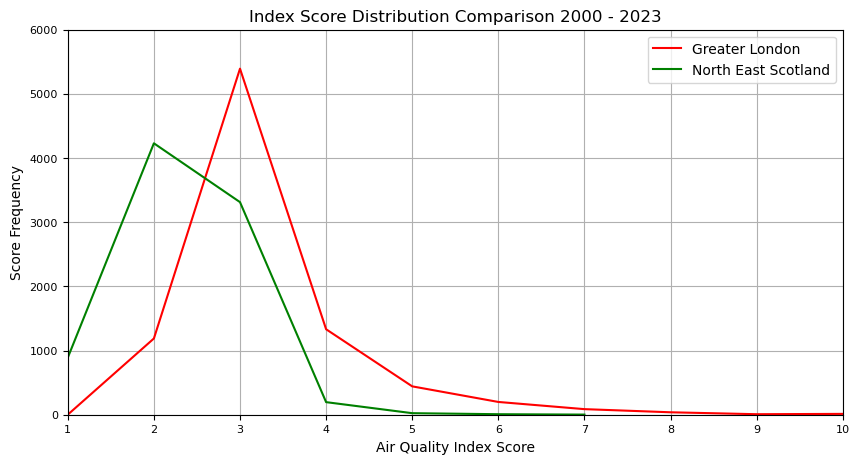

In [57]:
Best_v_Worst = df[['Greater London', 'North East Scotland']].apply(pd.Series.value_counts)
Best_v_Worst.plot(kind = 'line',
                  color = ('red', 'green'),
                  figsize = (10,5),
                  title = 'Index Score Distribution Comparison 2000 - 2023',
                  xlabel = 'Air Quality Index Score', 
                  ylabel = 'Score Frequency',
                  fontsize = 8, 
                  grid = 1, 
                  ylim = (0,6000), 
                  xlim = (1,10))
                

The difference in the distribution of the scores for the best and worst performing areas can clearly be seen in the comparison above.

In [60]:
Month_avg_df = df.groupby(pd.Grouper(freq='m', key='Date')).mean()
Month_avg_df

,Central Scotland,East Midlands,Eastern,Greater London,Highland,North East,North East Scotland,North Wales,North West & Merseyside,Northern Ireland,...,Greater Manchester Urban Area,Leicester Urban Area,Liverpool Urban Area,Nottingham Urban Area,Portsmouth Urban Area,Sheffield Urban Area,Swansea Urban Area,Tyneside,West Midlands Urban Area,West Yorkshire Urban Area
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2.967742,2.677419,2.612903,3.419355,3.035714,2.838710,1.290323,2.806452,3.000000,3.225806,...,2.903226,2.129032,2.387097,2.161290,NaN,2.419355,3.193548,2.516129,2.419355,2.451613
2000-02-29,2.758621,2.965517,2.758621,3.448276,3.068966,2.896552,1.423077,3.000000,3.068966,3.172414,...,3.034483,2.392857,2.758621,2.275862,NaN,2.655172,2.965517,2.785714,2.793103,2.758621
2000-03-31,3.580645,2.967742,3.096774,4.322581,3.064516,3.096774,1.548387,3.032258,3.064516,3.129032,...,3.000000,2.387097,2.833333,2.548387,NaN,2.838710,3.774194,2.838710,3.064516,2.838710
2000-04-30,3.233333,3.233333,3.266667,3.433333,3.269231,3.400000,1.566667,3.166667,3.066667,3.266667,...,3.000000,2.666667,2.692308,2.866667,NaN,3.000000,3.233333,2.866667,2.966667,2.700000
2000-05-31,3.483871,3.935484,3.709677,3.516129,3.451613,3.645161,1.419355,3.483871,3.774194,3.838710,...,3.580645,3.032258,3.193548,3.290323,NaN,3.322581,4.096774,3.064516,3.451613,3.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,3.300000,3.600000,4.033333,4.200000,3.466667,3.100000,2.900000,3.500000,3.733333,3.333333,...,3.366667,3.400000,3.400000,3.266667,3.566667,3.433333,3.266667,2.866667,3.600000,3.400000
2023-07-31,2.580645,2.612903,3.032258,2.903226,2.612903,2.483871,2.677419,2.258065,2.548387,2.161290,...,2.225806,2.322581,2.322581,2.290323,2.451613,2.193548,2.580645,2.129032,2.419355,2.419355
2023-08-31,2.774194,2.709677,2.967742,2.741935,2.645161,2.516129,2.548387,2.290323,2.677419,2.193548,...,2.161290,2.290323,2.322581,2.258065,2.258065,2.161290,2.419355,2.064516,2.548387,2.225806


In [61]:
Month_avg_df.describe()

,Central Scotland,East Midlands,Eastern,Greater London,Highland,North East,North East Scotland,North Wales,North West & Merseyside,Northern Ireland,...,Greater Manchester Urban Area,Leicester Urban Area,Liverpool Urban Area,Nottingham Urban Area,Portsmouth Urban Area,Sheffield Urban Area,Swansea Urban Area,Tyneside,West Midlands Urban Area,West Yorkshire Urban Area
count,286.000000,286.000000,286.000000,286.000000,285.000000,286.000000,286.000000,285.000000,286.000000,286.000000,...,286.000000,286.000000,279.000000,286.000000,274.000000,285.000000,286.000000,286.000000,286.000000,286.000000
mean,2.948381,2.987946,3.175963,3.265247,2.936365,2.811795,2.338649,2.780059,3.076026,2.812232,...,2.683292,2.473303,2.566669,2.407418,2.505082,2.543967,2.893831,2.431617,2.766354,2.574619
std,0.398303,0.398796,0.482504,0.449763,0.397448,0.431288,0.516988,0.436262,0.452649,0.443509,...,0.476591,0.423807,0.433916,0.362296,0.541033,0.409643,0.438622,0.370571,0.405702,0.433089
min,2.032258,2.161290,2.225806,2.161290,1.000000,2.032258,1.043478,1.100000,2.193548,2.000000,...,1.935484,1.000000,1.129032,1.290323,1.000000,1.083333,2.000000,1.200000,2.032258,1.645161
25%,2.700000,2.735484,2.838710,3.000000,2.800000,2.516129,2.066667,2.548387,2.806452,2.470968,...,2.292742,2.161290,2.295161,2.129032,2.195161,2.258065,2.580645,2.151434,2.451613,2.233333
50%,2.935484,2.967204,3.065591,3.262366,2.967742,2.779954,2.361905,2.821429,3.000000,2.870968,...,2.645161,2.419355,2.548387,2.333333,2.483871,2.483871,2.838710,2.372989,2.741935,2.533333
75%,3.161290,3.233333,3.483871,3.529032,3.066667,3.066667,2.677419,3.000000,3.300000,3.099194,...,2.967742,2.764655,2.852688,2.645161,2.866667,2.833333,3.193548,2.686884,3.064516,2.806452
max,4.677419,4.677419,5.483871,4.967742,4.129032,4.533333,3.709677,4.354839,5.225806,5.677419,...,4.935484,4.064516,3.806452,3.709677,4.354839,4.172414,4.133333,3.714286,4.032258,4.392857


In order to more easilly plot trends over time the scores have been averaged over each month above.

To produce the aggregations based on country and region/urban area the following dataframes have been made with their respective areas.

In [62]:
Urban_Areas = (Month_avg_df[['Greater London', 'Belfast Metropolitan Urban Area',
 'Brighton/Worthing/Littlehampton', 'Bristol Urban Area',
 'Cardiff Urban Area', 'Edinburgh Urban Area', 'Glasgow Urban Area',
 'Greater Manchester Urban Area', 'Leicester Urban Area',
 'Liverpool Urban Area', 'Nottingham Urban Area', 'Portsmouth Urban Area',
 'Sheffield Urban Area', 'Swansea Urban Area', 'Tyneside',
 'West Midlands Urban Area', 'West Yorkshire Urban Area']])
#Urban_Areas

In [63]:
Urban_Areas_Agg = pd.DataFrame(Month_avg_df[['Greater London', 'Belfast Metropolitan Urban Area',
 'Brighton/Worthing/Littlehampton', 'Bristol Urban Area',
 'Cardiff Urban Area', 'Edinburgh Urban Area', 'Glasgow Urban Area',
 'Greater Manchester Urban Area', 'Leicester Urban Area',
 'Liverpool Urban Area', 'Nottingham Urban Area', 'Portsmouth Urban Area',
 'Sheffield Urban Area', 'Swansea Urban Area', 'Tyneside',
 'West Midlands Urban Area', 'West Yorkshire Urban Area']].mean(axis =1))
Urban_Areas_Agg.columns = ['Urban Areas Average']
#Urban_Areas_Agg

In [64]:
Regions = (Month_avg_df[['Central Scotland', 'East Midlands', 'Eastern', 'Highland',
 'North East', 'North East Scotland', 'North Wales',
 'North West & Merseyside', 'Northern Ireland', 'Scottish Borders',
 'South East', 'South Wales', 'South West', 'West Midlands',
 'Yorkshire & Humberside']])
#Regions

In [65]:
Regions_Agg = pd.DataFrame(Month_avg_df[['Central Scotland', 'East Midlands', 'Eastern', 'Highland',
 'North East', 'North East Scotland', 'North Wales',
 'North West & Merseyside', 'Northern Ireland', 'Scottish Borders',
 'South East', 'South Wales', 'South West', 'West Midlands',
 'Yorkshire & Humberside']].mean(axis=1))
Regions_Agg.columns = ['Regions Average']
#Regions_Agg


In [66]:
England = (Month_avg_df[['East Midlands', 'Eastern', 'Greater London', 'North East',
 'North West & Merseyside', 'South East', 'South West', 'West Midlands',
 'Yorkshire & Humberside', 'Brighton/Worthing/Littlehampton', 'Bristol Urban Area',
 'Greater Manchester Urban Area', 'Leicester Urban Area',
 'Liverpool Urban Area', 'Nottingham Urban Area', 'Portsmouth Urban Area',
 'Sheffield Urban Area', 'Tyneside',
 'West Midlands Urban Area', 'West Yorkshire Urban Area']])
#England

In [67]:
England_Agg = pd.DataFrame(Month_avg_df[['East Midlands', 'Eastern', 'Greater London', 'North East',
 'North West & Merseyside', 'South East', 'South West', 'West Midlands',
 'Yorkshire & Humberside', 'Brighton/Worthing/Littlehampton', 'Bristol Urban Area',
 'Greater Manchester Urban Area', 'Leicester Urban Area',
 'Liverpool Urban Area', 'Nottingham Urban Area', 'Portsmouth Urban Area',
 'Sheffield Urban Area', 'Tyneside',
 'West Midlands Urban Area', 'West Yorkshire Urban Area']].mean(axis=1))
England_Agg.columns = ['England Average']

#England_Agg

In [68]:
Scotland = (Month_avg_df[['Central Scotland', 'Highland', 'North East Scotland', 
                'Scottish Borders', 'Edinburgh Urban Area', 'Glasgow Urban Area']])


In [69]:
Scotland_Agg = pd.DataFrame(Month_avg_df[['Central Scotland', 'Highland', 'North East Scotland', 
                'Scottish Borders', 'Edinburgh Urban Area', 'Glasgow Urban Area']].mean(axis=1))
Scotland_Agg.columns = ['Scotland Average']
#Scotland_Agg

In [70]:
Wales = (Month_avg_df[['North Wales', 'South Wales', 'Cardiff Urban Area', 'Swansea Urban Area']])
#Wales

In [71]:
Wales_Agg = pd.DataFrame(Month_avg_df[['North Wales', 'South Wales', 'Cardiff Urban Area', 'Swansea Urban Area']].mean(axis=1))
Wales_Agg.columns = ['Wales Average']
#Wales_Agg

In [72]:
Northern_Ireland = (Month_avg_df[['Northern Ireland', 'Belfast Metropolitan Urban Area']])
#NI

In [73]:
NI_Agg = pd.DataFrame(Month_avg_df[['Northern Ireland', 'Belfast Metropolitan Urban Area']].mean(axis=1))
NI_Agg.columns = ['NI Average']
#NI_Agg

<Axes: title={'center': 'Monthly Average Air Quality Index Score - Regions v Urban Areas 2000 - 2023'}, xlabel='Date', ylabel='Monthly Average Air Quality Index Score'>

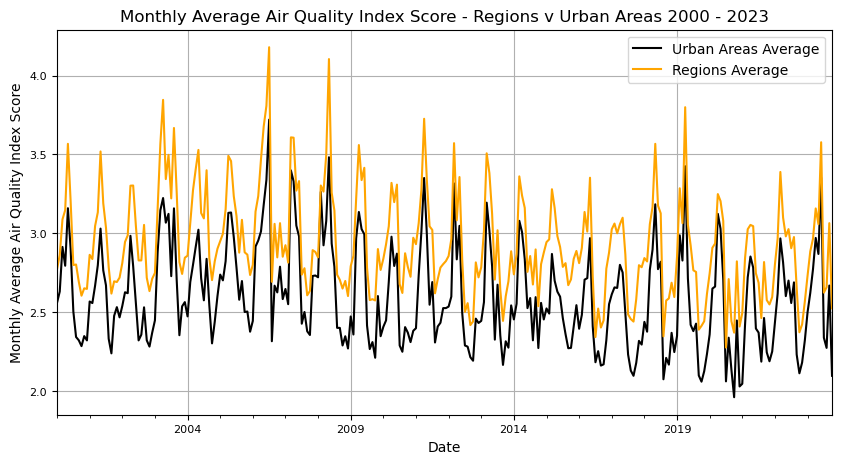

In [76]:

ax= Urban_Areas_Agg.plot(legend= 1, color = 'black')
Regions_Agg.plot(ax = ax,
                 legend = 1, 
                 figsize = (10,5),
                 color = ('orange'),
                 grid = 1, 
                 title = 'Monthly Average Air Quality Index Score - Regions v Urban Areas 2000 - 2023',
                 xlabel = 'Date', 
                 ylabel = 'Monthly Average Air Quality Index Score', 
                 fontsize = 8)



The plot above clearly shows the Urban v Region divide that was seen in the first bar chart.

We can also see there may be a very slight trend for improved air quality over the past 23 years. But the main factor in the air quality across the country is the time of year. There are great variations that appear to track with the months of the year.

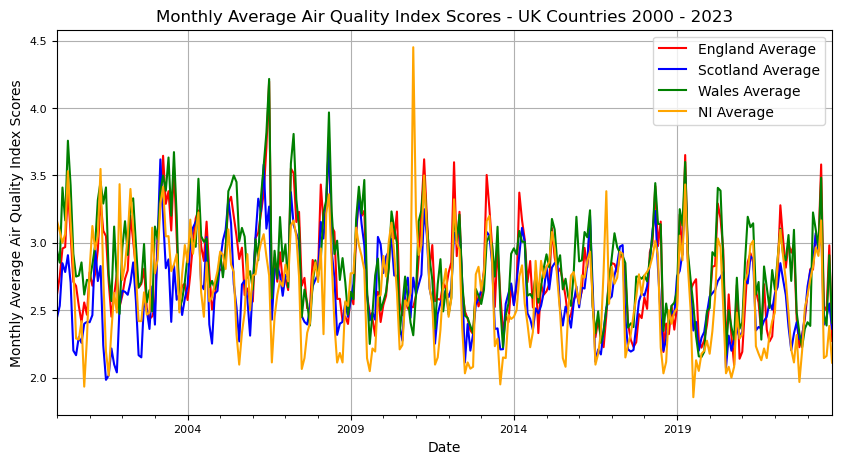

In [78]:
E = England_Agg.plot(legend= 1, color = 'red')
S = Scotland_Agg.plot(ax = E, legend= 1, color = 'blue')
W = Wales_Agg.plot(ax = S, legend= 1, color = 'green')

NI = NI_Agg.plot(ax = W ,
                 legend = 1, 
                 figsize = (10,5),
                 color = ('orange'),
                 grid = 1, 
                 title = 'Monthly Average Air Quality Index Scores - UK Countries 2000 - 2023',
                 xlabel = 'Date', 
                 ylabel = 'Monthly Average Air Quality Index Scores', 
                 fontsize = 8)
                

The same conculsions can be drawn when looking at the data split across the UK countries. However no significant difference between the countires can be seen at this scale on this graph.

<Axes: title={'center': 'Monthly Average Air Quality Index Score - Scotland 2015 - 2020'}, xlabel='Date', ylabel='Monthly Average Air Quality Index Score'>

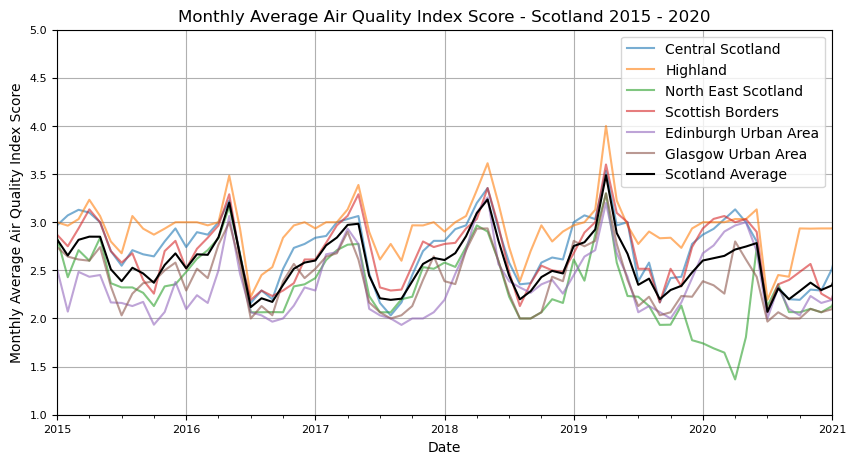

In [80]:
ax= Scotland.plot(legend= 1, alpha = 0.6)
Scotland_Agg.plot(ax = ax, 
                 legend = 1, 
                 figsize = (10,5),
                 color = ('black'),
                 grid = 1, 
                 title = 'Monthly Average Air Quality Index Score - Scotland 2015 - 2020',
                 xlabel = 'Date', 
                 ylabel = 'Monthly Average Air Quality Index Score', 
                 fontsize = 8,
                 xlim=(540,612),
                 ylim=(1,5))

A breakdown of the Scottish figures, incuding a Scotland average, for a more condensed time period is shown here. 

This more clearly shows the peaks and troughs of air quality throughout the year (Worst in the Spring and best in the Summer). We can also see the likely impacts of Covid in 2020, the March lockdowns implemented across the country lining up with the lack of Spring peak in Air Quality Index score. 
